# Predicting stock of Tongaat Hullets

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
141/141 [==============================] - 19s 99ms/step - loss: 0.0090
Epoch 2/50
141/141 [==============================] - 15s 104ms/step - loss: 0.0022
Epoch 3/50
141/141 [==============================] - 15s 108ms/step - loss: 0.0022
Epoch 4/50
141/141 [==============================] - 15s 108ms/step - loss: 0.0019
Epoch 5/50
141/141 [==============================] - 16s 111ms/step - loss: 0.0016
Epoch 6/50
141/141 [==============================] - 15s 109ms/step - loss: 0.0017
Epoch 7/50
141/141 [==============================] - 15s 110ms/step - loss: 0.0016
Epoch 8/50
141/141 [==============================] - 18s 125ms/step - loss: 0.0014
Epoch 9/50
141/141 [==============================] - 16s 114ms/step - loss: 0.0014
Epoch 10/50
141/141 [==============================] - 16s 114ms/step - loss: 0.0013
Epoch 11/50
141/141 [==============================] - 16s 110ms/step - loss: 0.0011
Epoch 

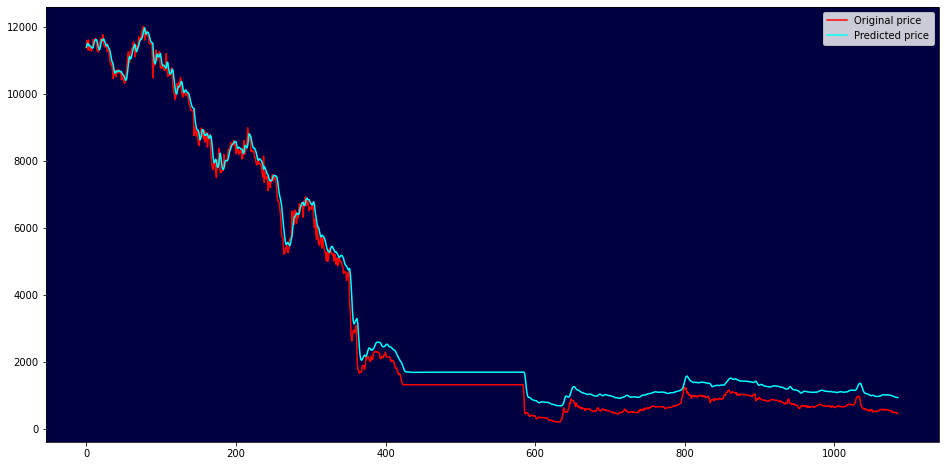

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import stonks

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

df = stonks.GetStockHistory('TON')

df = df['Open'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)

dataset_test = scaler.transform(dataset_test)

x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

model = load_model('stock_prediction.h5')

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()